In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt

NB_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(NB_DIR)
RAW_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'raw')
os.makedirs(RAW_DATA_DIR, exist_ok=True)

FIG_DIR = os.path.join(PROJECT_ROOT, 'data','reports')
os.makedirs(FIG_DIR, exist_ok=True)


In [39]:
df = pd.read_csv(os.path.join(RAW_DATA_DIR, 'california_housing_train.csv'))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


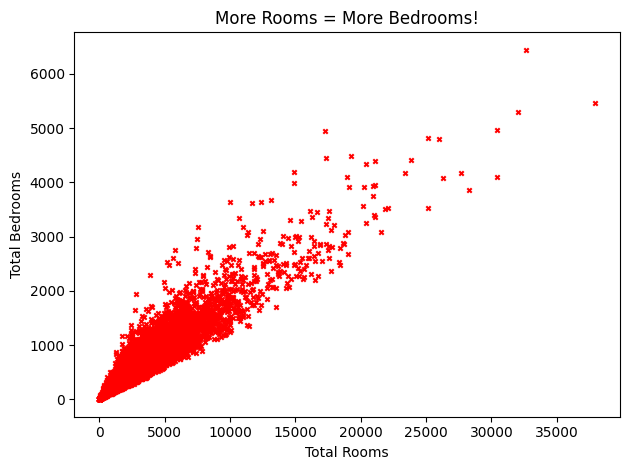

In [40]:
plt.scatter(
  x = df['total_rooms'], # column first representation
  y = df['total_bedrooms'],
  marker = 'x', # marker type (x, o etc)
  c = 'red',    # color
  s = 10,       # size
)

# lets also set name to X and Y axes
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')

# and the title of the plot
plt.title('More Rooms = More Bedrooms!')

# in interactive enrionemnts (like notebooks) we 'show' the plots
# in script mode (running a file with python cli) we would 'save' them
plt.tight_layout()
#plt.savefig(os.path.join(FIG_DIR, 'bedrooms-vs-rooms.png'))
plt.show()

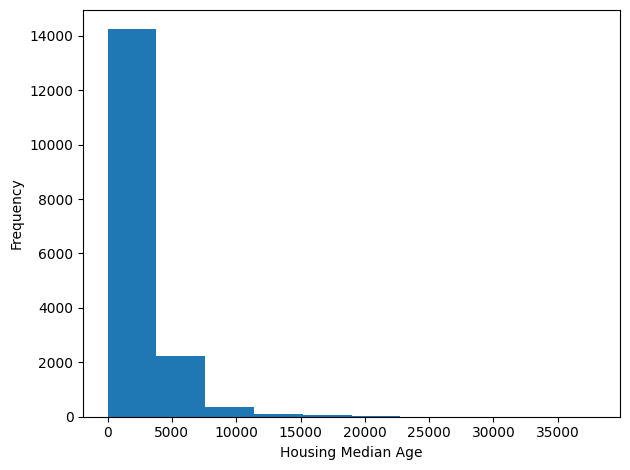

In [41]:
plt.hist(
  x = df['total_rooms'],
  bins = 10 # number of bins = number of bars
)

plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.tight_layout()
#plt.savefig(os.path.join(FIG_DIR, 'age_frequency.png'))

plt.show()

In [42]:
# a larger dataframe

traffic_path = (os.path.join(RAW_DATA_DIR, 'covid_traffic_injuries.csv'))

# None is a special data type that represents - nothing
# pd.DataFrame(<DATA>)

df = pd.read_csv(traffic_path) # pd.read_excel() # pd.read_sql()

# filtering rows by column values
df = (df[df['Province'] == 'Bagmati']).copy()

def clean_data(df):
    # Rename column 'District, where the crash occurred' to 'District'
    df = df.rename(columns={'District, where the crash occurred': 'District'})
    # Drop column: 'Nepali Month of road crash'
    df = df.drop(columns=['Nepali Month of road crash'])
    # Drop column: 'Date(AD) of road crash'
    df = df.drop(columns=['Date(AD) of road crash'])
    # Rename column 'Date(Bikram Sambat)' to 'Date_BS'
    df = df.rename(columns={'Date(Bikram Sambat)': 'Date_BS'})
    # Drop column: 'Province'
    df = df.drop(columns={'Province', 'Sex', 'Sex.1'})
    # Drop columns: 'Unnamed: 14', 'Umnnamed: 15' and 6 other columns
    df = df.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'])

    return df

df = (clean_data(df).copy()).set_index('Date_BS')

# found out that its really stupidly tuff to change the dd/mm/yyyy (bs) format to standard
# either operate on string or be prepared to drop NaT


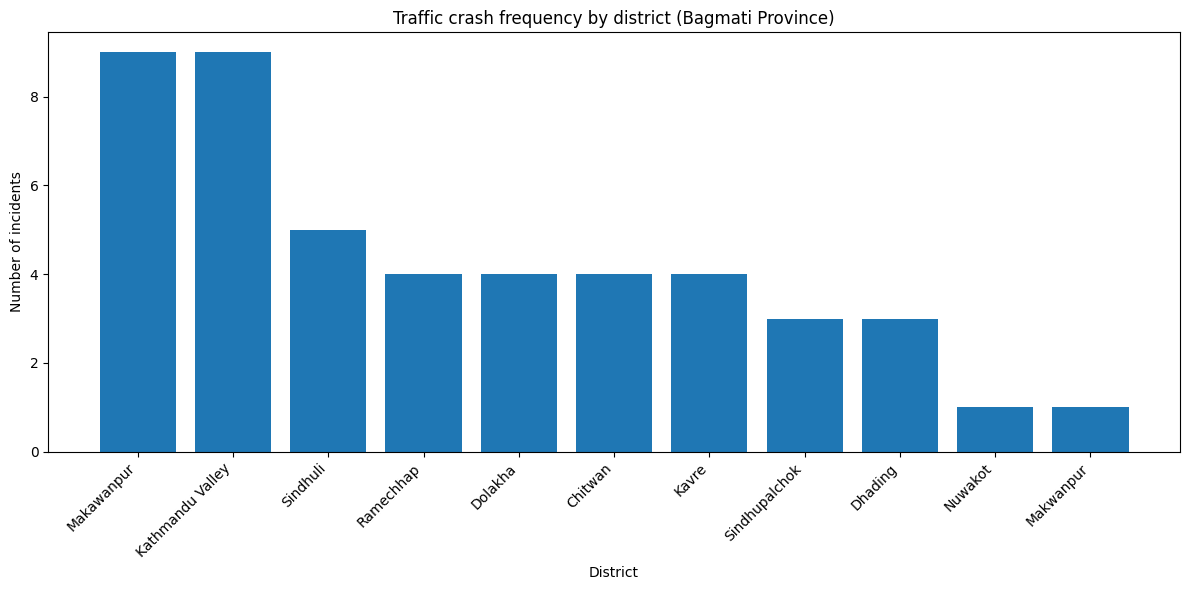

In [43]:


dis_freq = df['District'].value_counts().sort_values(ascending=False).reset_index()
dis_freq.columns = ['District', 'Number of incidents']

plt.figure(figsize=(12,6))
plt.bar(x=dis_freq['District'], height=dis_freq['Number of incidents'], color='C0')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of incidents')
plt.xlabel('District')
plt.title('Traffic crash frequency by district (Bagmati Province)')
plt.tight_layout()
#plt.savefig(os.path.join(FIG_DIR, 'district_frequency_vertical.png'))
plt.show()

# change this as horizontal vs vertical

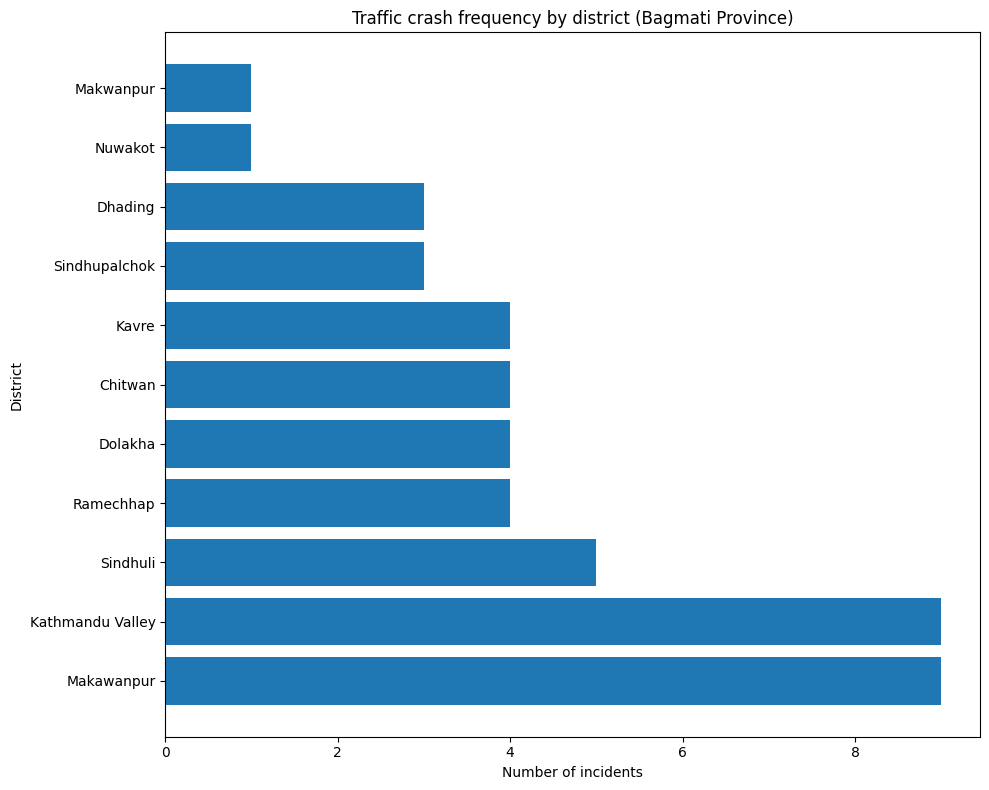

In [44]:
# alternative horizontal

plt.figure(figsize=(10,8))
plt.barh(y=dis_freq['District'], width=dis_freq['Number of incidents'], color='C0')
plt.xlabel('Number of incidents')
plt.ylabel('District')
plt.title('Traffic crash frequency by district (Bagmati Province)')
plt.tight_layout()
#plt.savefig(os.path.join(FIG_DIR, 'district_frequency_horizontal.png'))
plt.show()